# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import matplotlib.pyplot as plt
from matplotlib import cm
from HouseholdSpecializationModel import HouseholdSpecializationModelClass


# Question 1

Assignment: Illustrate the effect of a change in both σ = {0.5,1.0,1.5} and α ∈ {0.25,0.50,0.75} on the HF/HM Ratio.

Our Solution: See comments below

c:\Users\luke-\Desktop\Uni\Semester 10 SS23 (Master)\Introduction to Programming\projects-2023-shashi-buhle\projects-2023-shashi-buhle\inauguralproject\HouseholdSpecializationModel.py:70: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha,0.250000,0.500000,0.750000
sigma,,,
0.500000,0.55,1.00,1.83
1.000000,0.31,1.00,3.25
1.500000,0.21,1.00,4.67


c:\Users\luke-\Desktop\Uni\Semester 10 SS23 (Master)\Introduction to Programming\projects-2023-shashi-buhle\projects-2023-shashi-buhle\inauguralproject\HouseholdSpecializationModel.py:70: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


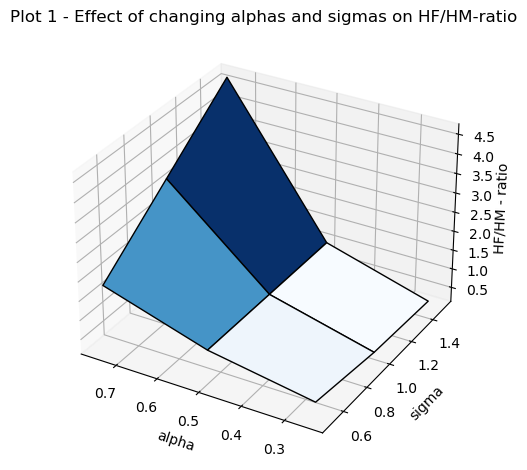

In [2]:
# create an instance of HouseholdSpecializationModelClass
hsm = HouseholdSpecializationModelClass()

# define the values for alpha and sigma as tuples
alpha_values = (0.25, 0.5, 0.75)
sigma_values = (0.5, 1.0, 1.5)

# create an empty pandas DataFrame with columns as alpha and rows as sigma
df = pd.DataFrame(columns = pd.Index(alpha_values, name="alpha"), index = pd.Index(sigma_values, name = "sigma"))

# loop through each value of alpha and sigma to generate results for different parameter combinations
for i in alpha_values:
    for j in sigma_values:
        # set the parameters of the household specialization model to the current alpha and sigma values
        hsm.par.alpha = i
        hsm.par.sigma = j
        # solve the model and get the results
        results = hsm.solve_discrete()
        # calculate the ratio of female to male hours of work
        ratio = results.HF / results.HM
        # used to update the value in the DataFrame at the row index "j" and column index "i" with a string representation of the "ratio" value rounded to two decimals.
        df.loc[j,i] = f"{ratio:.2f}"   
        
# apply a gradient background color to the DataFrame based on the cell values to make it look more pleasing to the eye
styled_df = df.style.background_gradient(cmap='Blues')

# create a MultiIndex header for the DataFrame with 'alpha' as the main category
header = pd.MultiIndex.from_product([['alpha'], alpha_values])
# assign the header to the columns of the DataFrame
styled_df.columns = header
# center-align the table headers
styled_df.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

# Add a title to the DataFrame
styled_df = df.style.set_caption("Plot 1 - Effect of changing alphas and sigmas on HF/HM-ratio")

# Render the styled DataFrame as HTML
display(styled_df)

#now we want to illustrate the Data with a meshgrid 

#create a meshgrid of the above values
alpha, sigma = np.meshgrid(alpha_values, sigma_values)

#generate a 3x3 matrix of zeros and use for loops to calculate the HF/HM ratio for each value of sigma & alpha
#solve the model discretly thereby calculating the ratio for each instance [i,j]
HF_HM_ratio = np.zeros((3, 3))

for i in range (alpha.shape[0]):
    for j in range (sigma.shape[1]):
        hsm.par.alpha = alpha[i,j]
        hsm.par.sigma = sigma[i,j]
        opt = hsm.solve_discrete()
        HF_HM_ratio[i,j] = (opt.HF/opt.HM)

#3D plot to encompass all the effects of variable changes in one illustration
%matplotlib inline
fig = plt.figure() 
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.plot_surface(alpha,sigma,HF_HM_ratio, cmap=cm.Blues, edgecolor='black'); 

#making the plot pretty
ax.set_xlabel('alpha') 
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM - ratio')
ax.set_title("Plot 1 - Effect of changing alphas and sigmas on HF/HM-ratio")
ax.zaxis.labelpad=0.05
ax.invert_xaxis()
fig.tight_layout()


Economic interpretation: We see from Plot 1 that by increasing either alpha or sigma, we see an increase in the HF/HM ratio. We can see that by holding a small value of sigma constant (i.e. 0.5) and increasing alpha, we get a smaller variation in the HF/HM ratio than if we were to have a large value of sigma (i.e. 1.5).

When we increase household production (σ and α), women will tend to work more from home than men. With very large values of sigma and alpha, we see that the HF/HM ratio will be very high and so women will tend to work a lot more from home than men. 

# Question 2

Assignment: Plot log(HF/HM) against log(wF/wM) for wF ∈[0.8,0.9,1.0,1.1,1.2]

Our Solution: See comments in the code down below

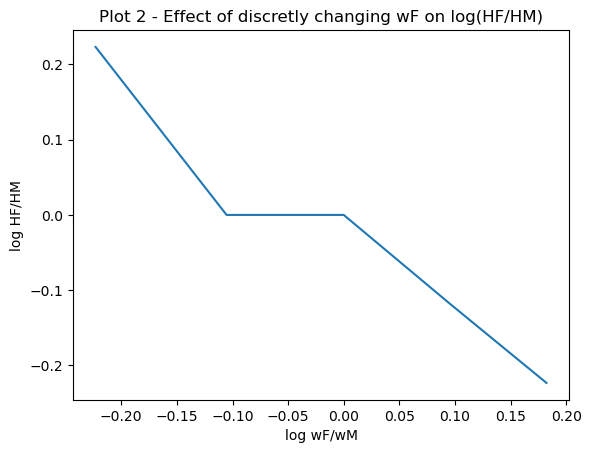

In [3]:
#reset alpha and sigma to the values specified in the project
hsm.par.alpha = 0.5
hsm.par.sigma = 1

#get wages for male and female from the HouseholdSpecializationModel
wF = hsm.par.wF_vec
wM = hsm.par.wM

#create empty lists for the values of log(HF/HM) and log(wF/wM)
log_ratio = []
log_wages = []

#iterate over the different values for wF and find the optimal values for HF and HM using the discrete solver from the 
#HouseholdSpecializationModel. Then append resulting values to the lists above
for femalewages in wF:
    hsm.par.wF = femalewages
    opt = hsm.solve_discrete()
    log_ratio.append(np.log(opt.HF/opt.HM))
    log_wages.append(np.log(femalewages/wM))

#plot the resulting values for log(HF/HM) and log(wF/wM) against each other
plt.plot(log_wages, log_ratio)
plt.xlabel("log wF/wM")
plt.ylabel("log HF/HM")
plt.title("Plot 2 - Effect of discretly changing wF on log(HF/HM)")
plt.show()

Economic interpretation: The higher the female wage wF gets the lower the value for log(HF/HM). If the female wage wF at the labour market is low the optimal solution of our problem would be to have the female work more hours in the household compared to the man. If wages for females are higher in the labour market the balance tips in favour of the man doing more work at home 

# Question 3

Assignment: Plot log HF/HM against log wF/wM for wF ∈[0.8,0.9,1.0,1.1,1.2] and solve continuously


Our Solution: To solve the model continuously we must define the solve() function in the HouseholdSpecializationModel.py file. We define an objective function and call it the value_of_choice whereby we list each of the variables LM, HM, LF, HF (in order) and set it equal to x, to which we then return the negative of the utility function. Additionally, we must also set constraints on our variables to restrict our set of solutions to be within (0,24) given the layout of the model parameters. We include an arbitrary initial guess that we then include in our optimize.minimize command that is used to minimize the negative of our value_of_choice function subject to our set constraints and bounds. The approach uses the Nelder-Mead method in order to solve the model in this multi-dimensional space. 

c:\Users\luke-\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:565: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


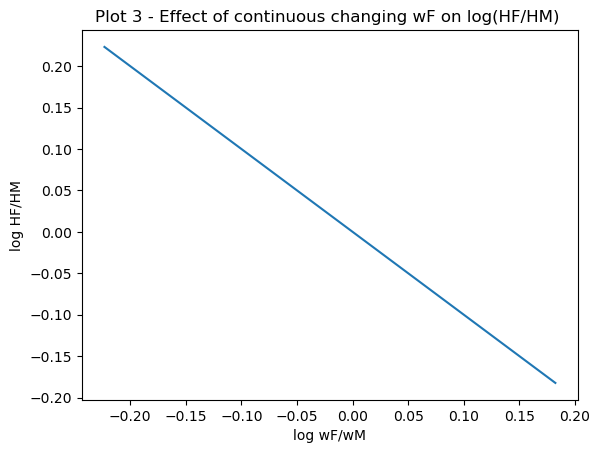

In [4]:
#get wages for male and female from the householdspecializationmodel
wF = hsm.par.wF_vec
wM = hsm.par.wM

#reset alpha and sigma values to a constant term
hsm.par.alpha = 0.5
hsm.par.sigma = 1

#create empty lists for the values of log(HF/HM) and log(wF/wM)
log_wages_continuous = []
log_ratio_continuous = []

#iterate over the different values for wF and find the optimal values for HF and HM using the discrete solver from the 
#HouseholdSpecializationModel. Then append resulting values to the lists above
for femalewages in wF:
    hsm.par.wF = femalewages
    opt = hsm.solve()
    log_ratio_continuous.append(np.log(opt.HF/opt.HM))
    log_wages_continuous.append(np.log(femalewages/wM))

#plot the resulting values for log(HF/HM) and log(wF/wM) against each other
plt.plot(log_wages_continuous, log_ratio_continuous)
plt.xlabel("log wF/wM")
plt.ylabel("log HF/HM")
plt.title("Plot 3 - Effect of continuous changing wF on log(HF/HM) ")
plt.show()

Economic interpretation (same as for question 2): The higher the female wage wF gets the lower the value for log(HF/HM). If the female wage wF at the labour market is low the optimal solution of our problem would be to have the female work more hours in the household compared to the man. If wages for females are higher in the labour market the balance tips in favour of the man doing more work at home

# Question 4

Assignment: 

Choose α and σ such it minimizes (β0 − β0)^2 + (β1 − β1)^2. 

We llustrate how the model fits the data and discuss the economic interpretation of the results. We use the continuous values for Lm, Lf, Wm, Wf.


Our Solution:

We define our objective function within our estimate and minimize it to find the optimal values of alpha and sigma that best fit the model. Our objective function is minimized with respect to the regression and vector of female wages as can be seen in the HouseholdSpecializationModel.py. By calling on the solver, we obtain optimal values for our fitted parameters and display the results below:

In [9]:
hsm.printing_estimate()

c:\Users\luke-\Desktop\Uni\Semester 10 SS23 (Master)\Introduction to Programming\projects-2023-shashi-buhle\projects-2023-shashi-buhle\inauguralproject\HouseholdSpecializationModel.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\luke-\Desktop\Uni\Semester 10 SS23 (Master)\Introduction to Programming\projects-2023-shashi-buhle\projects-2023-shashi-buhle\inauguralproject\HouseholdSpecializationModel.py:70: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Running the function was a success: True

Results:

The alpha fitted to the data: 0.800000

The sigma fitted to the data: 0.999020


Economic interpretation:

The regression equation log HF/HM = β0 + β1 log wF/wM showcases the relationship between the log of the ratio of hours worked at home by females versus males as the dependent variable and the log of their relative wage ratio as the independent variable. 

The value of β1 = -0.1 represents the effect a one unit change in the log of their wage ratio has on the log ratio of hours worked at home. Essentially, the model states that a one unit increase in the log ratio of female wages in relation to male wages represents a -0.1 decrease in the log ratio of hours that females spend working at home relative to the male. This indicates that as the ratio of female to male wages increases, the amount of time spent working at home by females decreases. 

Our σ = 0.99 indicates high substitution between female and male labour as sigma is approximately 1.0.

The value of α = 0.80 indicates that household production is not equally productive amongst males and females and females tend to be more productive at home. 


# Question 5

Assignment: Suggest and implement an extension of the model, and analyze whether or not it can help match the data when α = 0.5.


Our Solution: Holding a fixed value of α = 0.50 a we again tried to fit a σ to the existing data presented in the paper. The code is similar to the one used in question 4.

In [10]:
hsm.printing_estimate_alpha()

Running the function was a success: True

Result:

The alpha was set to: 0.500000

The sigma fitted to the data is: 1.003848


Economic interpretation: 

Holding a fixed value of α = 0.50 we were able to fit a value of σ = 1.003848 to the data. 

The σ we found beeing this close to 1 suggest perfect substitution between female and male labour at home if α is held at a value of 0.50 (male and female household production is the same) 